In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ob_df = pd.read_csv('observations.csv')
sp_df = pd.read_csv('species_info.csv')
print(ob_df.head())
#print(ob_df.tail())
print(ob_df.columns)
#print(ob_df.dtypes)
print(sp_df.head())
#print(sp_df.tail())
print(sp_df.columns)
#print(sp_df.dtypes)

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Index(['scientific_name', 'park_name', 'observations'], dtype='object')
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              Am

In [3]:
print(sp_df.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [4]:
print(ob_df.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [5]:
print(sp_df.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
print(ob_df[ob_df.scientific_name == 'Vicia benghalensis'])

          scientific_name                            park_name  observations
0      Vicia benghalensis  Great Smoky Mountains National Park            68
10447  Vicia benghalensis               Yosemite National Park           148
12455  Vicia benghalensis            Yellowstone National Park           247
15518  Vicia benghalensis                  Bryce National Park           104


In [7]:
print(sp_df[sp_df.scientific_name == 'Vicia benghalensis'])

            category     scientific_name                        common_names  \
5192  Vascular Plant  Vicia benghalensis  Purple Vetch, Reddish Tufted Vetch   

     conservation_status  
5192                 NaN  


In [8]:
df = pd.merge(ob_df, sp_df, how='left', on=['scientific_name', 'scientific_name'])
print(df.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


In [9]:
print(df[df.scientific_name == 'Vicia benghalensis'])

          scientific_name                            park_name  observations  \
0      Vicia benghalensis  Great Smoky Mountains National Park            68   
11517  Vicia benghalensis               Yosemite National Park           148   
13756  Vicia benghalensis            Yellowstone National Park           247   
17101  Vicia benghalensis                  Bryce National Park           104   

             category                        common_names conservation_status  
0      Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
11517  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
13756  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
17101  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  


Since the project is an attempt to look at biodiversity it would be useful to get a sense of category size within each park, and conservation status grouping size within each park. It would also be worth reviewing national numbers and comparing the parks accordingly... Looks like we'll probably have a number of bar plots...

In [10]:
Smoky_Mtn_NP = df[df.park_name == 'Great Smoky Mountains National Park']
Yosemite_NP = df[df.park_name == 'Yosemite National Park']
Yellowstone_NP = df[df.park_name == 'Yellowstone National Park']
Bryce_NP = df[df.park_name == 'Bryce National Park']
Vasc_Plants = df[df.category == 'Vascular Plant']
N_Vasc_Plants = df[df.category == 'Nonvascular Plant']
Mammals = df[df.category == 'Mammal']
Birds = df[df.category == 'Bird']
Reptiles = df[df.category == 'Reptile']
Amphibians = df[df.category == 'Amphibian']
Fish = df[df.category == 'Fish']

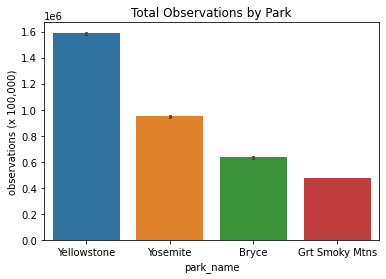

In [11]:
ax = plt.subplot()
sns.barplot(data=df, x='park_name', y='observations', estimator=sum, order=['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park'])
ax.set_xticklabels(['Yellowstone', 'Yosemite','Bryce','Grt Smoky Mtns'])
plt.ylabel('observations (x 100,000)')
plt.title('Total Observations by Park')
plt.savefig('Total_Park_Obv.png')
plt.show()

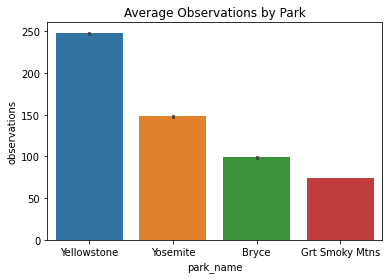

In [12]:
ax = plt.subplot()
sns.barplot(data=df, x='park_name', y='observations', order=['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park'])
ax.set_xticklabels(['Yellowstone', 'Yosemite','Bryce','Grt Smoky Mtns'])
plt.title('Average Observations by Park')
plt.savefig('Avg_Park_Obv.png')
plt.show()

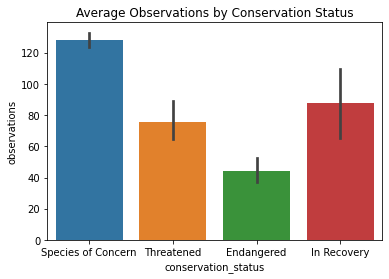

In [13]:
sns.barplot(data = df, x='conservation_status', y='observations')
plt.title('Average Observations by Conservation Status')
plt.savefig('Avg_Obv_Status.png')
plt.show()

In [32]:
df2 = df['conservation_status'].fillna('Normal', inplace=True)

In [33]:
df3 = df.dropna(how='any',axis=0)
print(df3.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0              Normal  
1              Normal  
2              Normal  
3              Normal  
4              Normal  


In [34]:
def Park_Cat(Park, Category):
    data = df[df.category == Category]
    data2 = np.sum(data[data.park_name == Park])
    return data2.observations

In [35]:
Yellowstone = Park_Cat('Yellowstone National Park', 'Mammal')
print(Yellowstone)

70701


In [38]:
print(df2.head())

Empty DataFrame
Columns: [scientific_name, park_name, observations, category, common_names, conservation_status]
Index: []


<AxesSubplot:xlabel='category', ylabel='observations'>

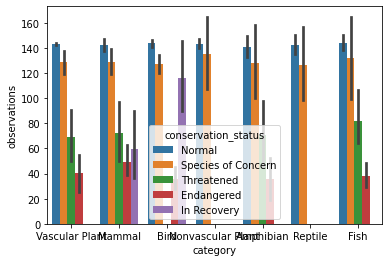

In [39]:
sns.barplot(data=df, x='category', y='observations', hue='conservation_status')

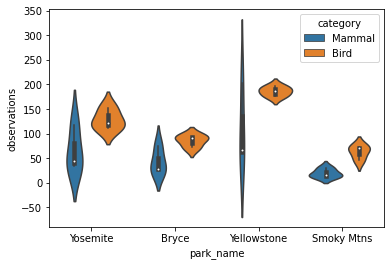

In [40]:
Recovery_df = df3[df3.conservation_status == 'In Recovery']
SoC_df = df3[df3.conservation_status == 'Species of Concern']
ax = plt.subplot()
sns.violinplot(data=Recovery_df, x='park_name', y='observations', hue='category')
ax.set_xticklabels(['Yosemite','Bryce','Yellowstone','Smoky Mtns'])
plt.show()

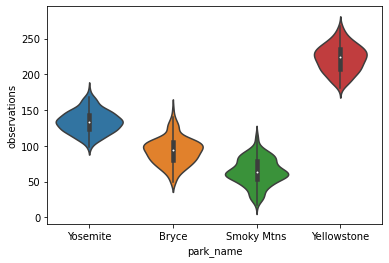

In [41]:
ax = plt.subplot()
sns.violinplot(data=SoC_df, x='park_name', y='observations')
ax.set_xticklabels(['Yosemite','Bryce','Smoky Mtns','Yellowstone'])
plt.show()

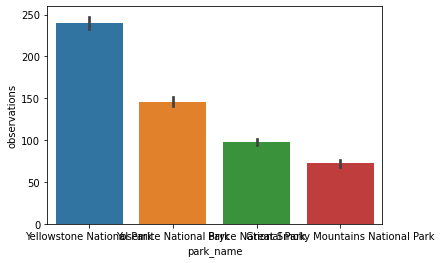

In [42]:
Vasc_Plants = df[df.category == 'Vascular Plant']
N_Vasc_Plants = df[df.category == 'Nonvascular Plant']
Mammals = df[df.category == 'Mammal']
Birds = df[df.category == 'Bird']
Reptiles = df[df.category == 'Reptile']
Amphibians = df[df.category == 'Amphibian']
Fish = df[df.category == 'Fish']
Park_Order = ['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park']

sns.barplot(data=Fish, x='park_name', y='observations', order=Park_Order)
plt.show()

In [43]:
Yellowstone = np.sum(Mammals[Mammals.park_name == 'Yellowstone National Park'])
Yosemite = np.sum(Mammals[Mammals.park_name == 'Yosemite National Park'])
Bryce = np.sum(Mammals[Mammals.park_name == 'Bryce National Park'])
Grt_Smoky = np.sum(Mammals[Mammals.park_name == 'Great Smoky Mountains National Park'])
print(Yellowstone.observations)
print(Yosemite.observations)
print(Bryce.observations)
print(Grt_Smoky.observations)


70701
42533
28830
21056


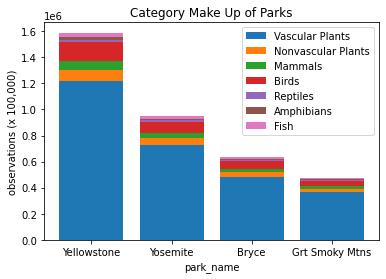

In [73]:
Vasc_Plants = [1218162,727895,484373,364882]
N_Vasc_Plants = [83021,49783,32992,24857]
Mammals = [70701,42533,28830,21056]
Birds = [144300,86612,58590,42869]
Reptiles = [20061,11779,8141,5841]
Amphibians = [19937,11713,7542,5876]
Fish = [31459,19137,12823,9482]
Park_Labels = ['Yellowstone','Yosemite','Bryce','Grt Smoky Mtns']
Types = ['Vascular Plants','Nonvascular Plants','Mammals','Birds','Reptiles','Amphibians','Fish']

ax=plt.subplot()
plt.bar(range(len(Park_Labels)),Vasc_Plants)
plt.bar(range(len(Park_Labels)),N_Vasc_Plants, bottom=Vasc_Plants)
plt.bar(range(len(Park_Labels)),Mammals, bottom=[Vasc_Plants[j] + N_Vasc_Plants[j] for j in range(len(Vasc_Plants))])
plt.bar(range(len(Park_Labels)),Birds, bottom=[Vasc_Plants[j] + N_Vasc_Plants[j] + Mammals[j] for j in range(len(Vasc_Plants))])
plt.bar(range(len(Park_Labels)),Reptiles, bottom=[Vasc_Plants[j] + N_Vasc_Plants[j] + Mammals[j] + Birds[j] for j in range(len(Vasc_Plants))])
plt.bar(range(len(Park_Labels)),Amphibians, bottom=[Vasc_Plants[j] + N_Vasc_Plants[j] + Mammals[j] + Birds[j] + Reptiles[j] for j in range(len(Vasc_Plants))])
plt.bar(range(len(Park_Labels)),Fish, bottom=[Vasc_Plants[j] + N_Vasc_Plants[j] + Mammals[j] + Birds[j] + Reptiles[j] + Amphibians[j] for j in range(len(Vasc_Plants))])
ax.set_xticks(range(len(Park_Labels)))
ax.set_xticklabels(Park_Labels)
plt.legend(Types)
plt.ylabel('observations (x 100,000)')
plt.xlabel('park_name')
plt.title('Category Make Up of Parks')
plt.savefig('Park_Cat_Stacked.png',bbox_inches='tight')
plt.show()

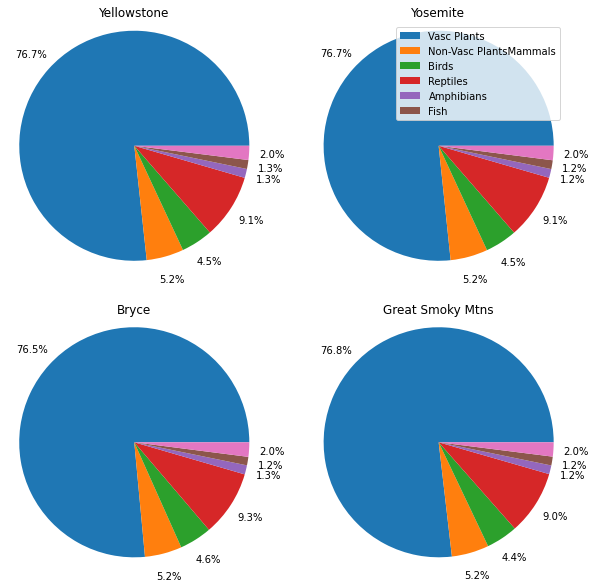

In [45]:
Vasc_Plants = [1218162,727895,484373,364882]
N_Vasc_Plants = [83021,49783,32992,24857]
Mammals = [70701,42533,28830,21056]
Birds = [144300,86612,58590,42869]
Reptiles = [20061,11779,8141,5841]
Amphibians = [19937,11713,7542,5876]
Fish = [31459,19137,12823,9482]
Category_Labels = ['Vasc Plants','Non-Vasc Plants''Mammals','Birds','Reptiles','Amphibians','Fish']
Yellowstone_Perc = [1218162, 83021, 70701,144300,20061,19937,31459]
Yosemite_Perc = [727895,49783,42533,86612,11779,11713,19137]
Bryce_Perc = [484373,32992,28830,58590,8141,7542,12823]
Smoky_Perc = [364882,24857,21056,42869,5841,5876,9482]
explode = [0,0.1,0.1,0.1,0.3,0.3,0.3]
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.pie(Yellowstone_Perc, autopct='%0.1f%%', pctdistance=1.2)
ax1.axis('equal')
ax1.set_title('Yellowstone')
ax2 = plt.subplot(2,2,2)
ax2.pie(Yosemite_Perc, autopct='%0.1f%%',pctdistance=1.2)
ax2.axis('equal')
ax2.legend(Category_Labels)
ax2.set_title('Yosemite')
ax3 = plt.subplot(2,2,3)
ax3.pie(Bryce_Perc, autopct='%0.1f%%',pctdistance=1.2)
ax3.axis('equal')
ax3.set_title('Bryce')
ax4 = plt.subplot(2,2,4)
ax4.pie(Smoky_Perc, autopct='%0.1f%%',pctdistance=1.2)
ax4.axis('equal')
ax4.set_title('Great Smoky Mtns')
plt.savefig('Park_Cat_Pie.png')
plt.show()

Based on the observations above the categories remain in relatively consistent proporation to one another in each park. Now that I've examined categories let's take a look at conservation status to see if there are any disparities betweek parks.

In [47]:
Recovery_df = df[df.conservation_status == 'In Recovery']
SoC_df = df[df.conservation_status == 'Species of Concern']
Endangered_df = df[df.conservation_status == 'Endangered']
Threatened_df = df[df.conservation_status == 'Threatened']
Normal_df = df[df.conservation_status == 'Normal']

Yellowstone = np.sum(Normal_df[Normal_df.park_name == 'Yellowstone National Park'])
Yosemite = np.sum(Normal_df[Normal_df.park_name == 'Yosemite National Park'])
Bryce = np.sum(Normal_df[Normal_df.park_name == 'Bryce National Park'])
Grt_Smoky = np.sum(Normal_df[Normal_df.park_name == 'Great Smoky Mountains National Park'])
print(Yellowstone.observations)
print(Yosemite.observations)
print(Bryce.observations)
print(Grt_Smoky.observations)

1543058
922539
614682
462047


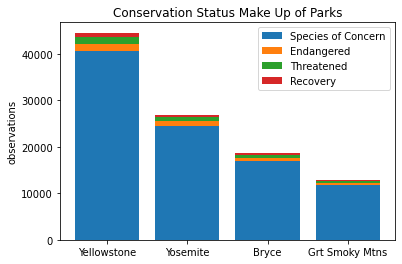

In [51]:
Recovery = [889,582,388,248]
SoC = [40677,24539,17011,11735]
Endangers = [1558,943,619,393]
Threatened = [1459,849,591,440]
Park_Labels = ['Yellowstone','Yosemite','Bryce','Grt Smoky Mtns']
Category = ['Species of Concern','Endangered','Threatened','Recovery']
ax=plt.subplot()
plt.bar(range(len(Park_Labels)),SoC)
plt.bar(range(len(Park_Labels)),Endangers, bottom=SoC)
plt.bar(range(len(Park_Labels)),Threatened, bottom=[SoC[j] + Endangers[j] for j in range(len(SoC))])
plt.bar(range(len(Park_Labels)),Recovery, bottom=[SoC[j] + Endangers[j] + Threatened[j] for j in range(len(SoC))])
ax.set_xticks(range(len(Park_Labels)))
ax.set_xticklabels(Park_Labels)
plt.legend(Category)
plt.ylabel('observations')
plt.title('Conservation Status Make Up of Parks')
plt.savefig('Status_Parks_Stacked.png')
plt.show()

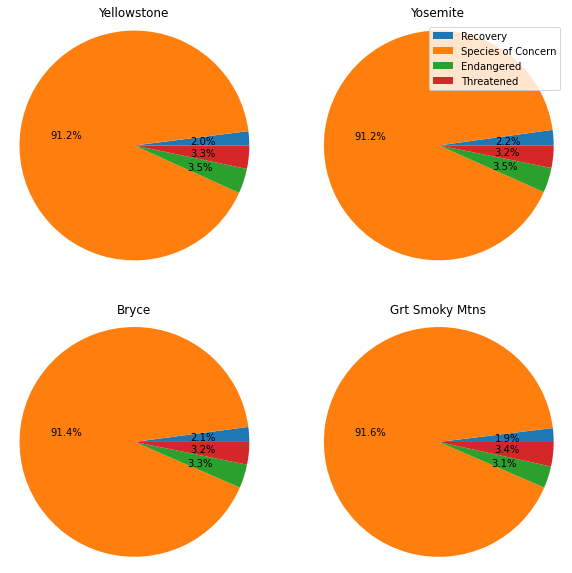

In [52]:
Recovery = [889,582,388,248]
SoC = [40677,24539,17011,11735]
Endangers = [1558,943,619,393]
Threatened = [1459,849,591,440]
Category_Labels = ['Recovery','Species of Concern','Endangered','Threatened']
Yellowstone_Perc = [889,40677,1558,1459]
Yosemite_Perc = [582,24539,943,849]
Bryce_Perc = [388,17011,619,591]
Smoky_Perc = [248,11735,393,440]
plt.figure(figsize=[10,10])
ax1 = plt.subplot(2,2,1)
ax1.pie(Yellowstone_Perc, autopct='%0.1f%%')
ax1.set_title('Yellowstone')
ax1.axis('equal')
ax2 = plt.subplot(2,2,2)
ax2.pie(Yosemite_Perc, autopct='%0.1f%%')
ax2.set_title('Yosemite')
ax2.legend(Category_Labels)
ax2.axis('equal')
ax3 = plt.subplot(2,2,3)
ax3.pie(Bryce_Perc, autopct='%0.1f%%')
ax3.set_title('Bryce')
ax3.axis('equal')
ax4 = plt.subplot(2,2,4)
ax4.pie(Smoky_Perc, autopct='%0.1f%%')
ax4.set_title('Grt Smoky Mtns')
ax4.axis('equal')
plt.savefig('Status_Parks_Pie.png')
plt.show()

In each of the parks we see a similar proportional breakdown of Conservation Categories. Geography does not seem to change anything proportionally. Each park has it's own proportional size however. I think next we need to look at animal category and see distribution by conservation categories. This is where there appears to be a degree of obvious variation.

In [56]:
Recovery_df = df[df.conservation_status == 'In Recovery']
SoC_df = df[df.conservation_status == 'Species of Concern']
Endangered_df = df[df.conservation_status == 'Endangered']
Threatened_df = df[df.conservation_status == 'Threatened']
Normal_df = df[df.conservation_status == 'Normal']

Vasc_Plants = np.sum(Normal_df[Normal_df.category == 'Vascular Plant'])
N_Vasc_Plants= np.sum(Normal_df[Normal_df.category == 'Nonvascular Plant'])
Mammals = np.sum(Normal_df[Normal_df.category == 'Mammal'])
Birds = np.sum(Normal_df[Normal_df.category == 'Bird'])
Reptiles = np.sum(Normal_df[Normal_df.category == 'Reptile'])
Amphibians = np.sum(Normal_df[Normal_df.category == 'Amphibian'])
Fish = np.sum(Normal_df[Normal_df.category == 'Fish'])
print(Vasc_Plants.observations)
print(N_Vasc_Plants.observations)
print(Mammals.observations)
print(Birds.observations)
print(Reptiles.observations)
print(Amphibians.observations)
print(Fish.observations)

2772463
187948
137974
289647
43286
42316
68692


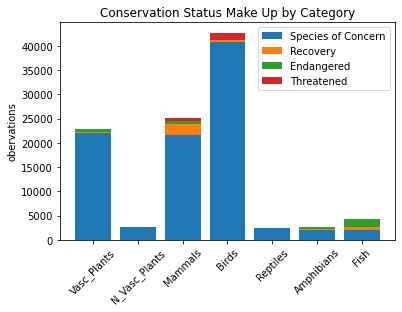

In [74]:
SoC = [22135,2705,21675,40758,2536,2044,2109]
Recovery = [0,0,715,1392,0,0,0]
Endangered = [162,0,2178,574,0,144,455]
Threatened = [552,0,578,0,0,564,1645]

Cat_Labels = ['Vasc_Plants','N_Vasc_Plants','Mammals','Birds','Reptiles','Amphibians','Fish']
Categories = ['Species of Concern','Recovery','Endangered','Threatened']
ax=plt.subplot()
plt.bar(range(len(Cat_Labels)),SoC)
plt.bar(range(len(Cat_Labels)),Endangered, bottom=SoC)
plt.bar(range(len(Cat_Labels)),Threatened, bottom=[SoC[j] + Endangered[j] for j in range(len(SoC))])
plt.bar(range(len(Cat_Labels)),Recovery, bottom=[SoC[j] + Endangered[j] + Threatened[j] for j in range(len(SoC))])
ax.set_xticks(range(len(Cat_Labels)))
ax.set_xticklabels(Cat_Labels, rotation=45)
plt.legend(Categories)
plt.ylabel('obervations')
plt.title('Conservation Status Make Up by Category')
plt.savefig('Status_Cat_Stacked.png',bbox_inches='tight')
plt.show()

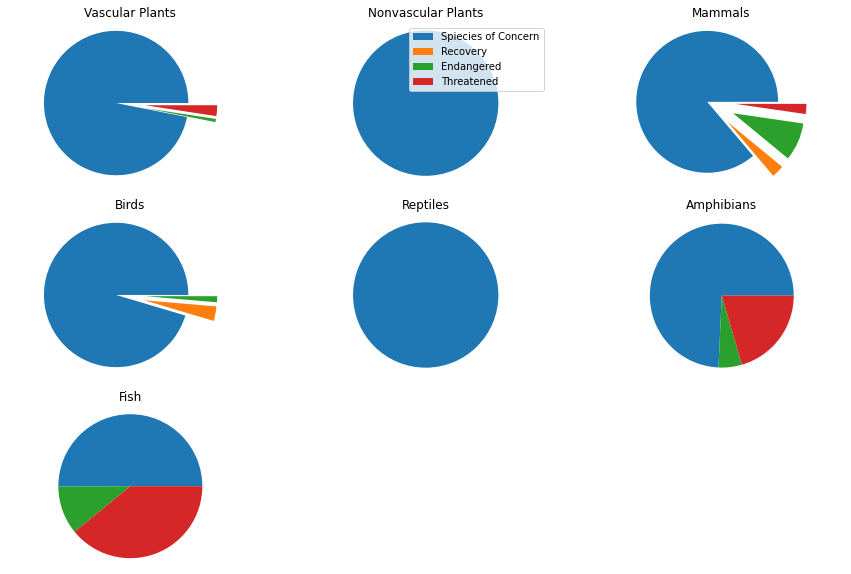

In [61]:
SoC = [22135,2705,21675,40758,2536,2044,2109]
Recovery = [0,0,715,1392,0,0,0]
Endangered = [162,0,2178,574,0,144,455]
Threatened = [552,0,578,0,0,564,1645]

Vasc_Plants = [22135,0,162,552]
N_Vasc_Plants = [2705,0,0,0]
Mammals = [21675,715,2178,578]
Birds = [40758,1392,574,0]
Reptiles = [2536,0,0,0]
Amphibians = [2044,0,144,564]
Fish = [2109,0,455,1645]
Cat_Labels = ['Spiecies of Concern','Recovery', 'Endangered','Threatened']
explode = [0,0.4,0.4,0.4]
plt.figure(figsize=(15,10))
ax1 = plt.subplot(3,3,1)
ax1.pie(Vasc_Plants, explode=explode)
ax1.set_title('Vascular Plants')
ax1.axis('equal')
ax2 = plt.subplot(3,3,2)
ax2.pie(N_Vasc_Plants)
ax2.set_title('Nonvascular Plants')
ax2.legend(Cat_Labels)
ax2.axis('equal')
ax3 = plt.subplot(3,3,3)
ax3.pie(Mammals, explode=explode)
ax3.set_title('Mammals')
ax3.axis('equal')
ax4 = plt.subplot(3,3,4)
ax4.pie(Birds, explode=explode)
ax4.set_title('Birds')
ax4.axis('equal')
ax5 = plt.subplot(3,3,5)
ax5.pie(Reptiles)
ax5.set_title('Reptiles')
ax5.axis('equal')
ax6 = plt.subplot(3,3,6)
ax6.pie(Amphibians)
ax6.set_title('Amphibians')
ax6.axis('equal')
ax7 = plt.subplot(3,3,7)
ax7.pie(Fish)
ax7.set_title('Fish')
ax7.axis('equal')
plt.savefig('Status_Cat_Pie.png')
plt.show()

If we remove Species of Concern which is the overwhelming majority (and in the case of Non-Vascular Plants and Reptiles the entirey) of the observations. Then we can zero on on some of the real differences between different categories. Birds and Mammals are the only categories that have observations in "Recovery". Fish, Amphibians and Vascular plants show roughly 1/5 of the observations are Endangered with nothing in recovery.

Conclusion:
    With in the national parks it is not sufficient to state that Biodiversity creates a significant impact on conservation status. In fact there seems to be some other element at play. Possibly human campaigns to protect more easily relatable mammals or bird species as opposed to less appreciated fish, amphibians or reptiles. It could also be notes that differing terrain between different parks could create the conditions for smaller or larger observable sets.

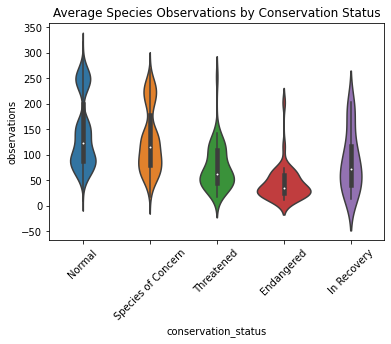

In [71]:
ax = plt.subplot()
sns.violinplot(data=df, x='conservation_status', y='observations')
ax.set_xticklabels(['Normal','Species of Concern','Threatened','Endangered','In Recovery'], rotation=45)
plt.title('Average Species Observations by Conservation Status')
plt.savefig('Avg_Obv_Status_Violin.png',bbox_inches='tight')
plt.show()